### Style

In [ ]:
# Verificamos los valores unicos de una columna categorica que tenemos: style, y observamos la cantidad de valores de cada uno
style_counts = df_wine_chemical['style'].value_counts(normalize = True)
style_counts

white    0.753886
red      0.246114
Name: style, dtype: float64

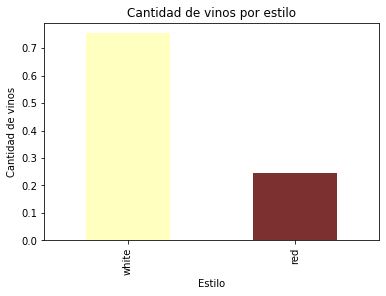

In [ ]:
# Grafico de barras para representar la cantidad de vinos por estilo
style_counts.plot(kind = 'bar', color =[COLOR__VINO_BLANCO, COLOR_VINO_TINTO])
plt.title('Cantidad de vinos por estilo')
plt.xlabel('Estilo')
plt.ylabel('Cantidad de vinos')
plt.show()


In [ ]:
print(f"Los vinos blancos representan el {round(style_counts.white * 100, 2)} % de los vinos")
print(f"Los vinos tintos representan el {round(style_counts.red * 100, 2)} % de los vinos")

Los vinos blancos representan el 75.39 % de los vinos
Los vinos tintos representan el 24.61 % de los vinos


In [3]:
from src.utils.paths import data_dir
import pandas as pd

In [7]:
# Obtenemos la ruta de los csv's que vamos a utilizar
CHEMICAL_WINE_RAW_PATH = data_dir("intermediate", "structured_chemical.csv")
COMERCIAL_WINE_RAW_PATH = data_dir("intermediate", "structured_comercial.csv")

CHEMICAL_WINE_RAW_PATH , COMERCIAL_WINE_RAW_PATH

(WindowsPath('c:/Users/cvigo/data-projects/proyecto-final-vinos/vinos-corderhouse/data/intermediate/structured_chemical.csv'),
 WindowsPath('c:/Users/cvigo/data-projects/proyecto-final-vinos/vinos-corderhouse/data/intermediate/structured_comercial.csv'))

In [8]:
# Leemos los csv's y los guardamos en un dataframe
df_wine_chemical = pd.read_csv(CHEMICAL_WINE_RAW_PATH)
df_wine_comercial = pd.read_csv(COMERCIAL_WINE_RAW_PATH)

In [10]:
df_wine_chemical.shape, df_wine_comercial.shape

((6497, 13), (6070, 10))

### winery

Winery es la columna con mas cardinalidad

In [ ]:
df_winery_freq_values = calculate_frequency_values(df_wine_comercial, 'winery')
df_winery_freq_values

,porcentaje,porcentaje_acumulado
Contino,6.8,6.8
Artadi,3.9,10.7
La Rioja Alta,3.8,14.5
Sierra Cantabria,3.5,18.0
Vina Pedrosa,3.4,21.4
...,...,...
Jesus Madrazo,0.0,94.1
Marco Abella,0.0,94.1
Sara Perez y Rene Barbier,0.0,94.1
Bodega Elias Mora,0.0,94.1


In [ ]:
# Vemos si podemos agrupar los valores de la columna winery para reducir los valores unicos
df_winery_freq_values[df_winery_freq_values['porcentaje_acumulado'] < 80]

,porcentaje,porcentaje_acumulado
Contino,6.8,6.8
Artadi,3.9,10.7
La Rioja Alta,3.8,14.5
Sierra Cantabria,3.5,18.0
Vina Pedrosa,3.4,21.4
Imperial,3.4,24.8
Losada,3.4,28.2
Matarromera,3.4,31.6
Sei Solo,3.4,35.0
Portal del Priorat,3.4,38.4


Vemos que el 80% de los datos sigue altamente distribuidos, por lo que una estrategia de reduccion de valores no sería conveniente. Procedemos a eliminar la columna winery.

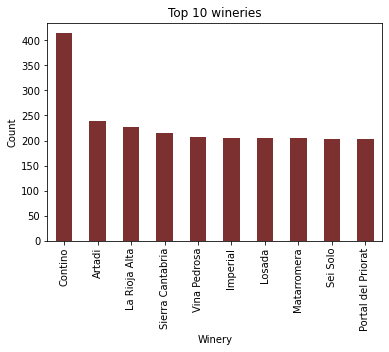

In [ ]:
df_wine_comercial.winery.value_counts().sort_values(ascending=False).head(10).plot(kind='bar',color=COLOR_VINO_TINTO)
plt.title('Top 10 wineries')
plt.xlabel('Winery')
plt.ylabel('Count')
plt.show()

In [ ]:
# eliminamos la columa winery
df_wine_comercial.drop(['winery'], axis=1, inplace=True)